# Variation in Genomics #

Code and tutorials for the Variation in Genomics exercise.

In this tutorial we will focus on the following topics:
	
	1. Whole genome sequence data analysis (BAM)
	2. Variation analysis (VCF)
	3. Functional annotation of variation (VEP)
	4. Genome-wide association study (GWAS)
	5. Identification of causal variation and functional interpretation.
	
In this exercise we will follow the line of the [`paper`](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1007661): 
"Derks MFL, Lopes MS, Bosse M, Madsen O, Dibbits B, et al. (2018) Balancing selection on a recessive lethal deletion with pleiotropic effects on two neighboring genes in the porcine genome. PLOS Genetics 14(9): e1007661."

The paper integrates genotype (SNPchip), whole genome sequence data (WGS), and phenotype information to describe a lethal recessive deletion in a commercial pig breed. 

## Part 1: Whole genome sequence data analysis ##
------------------

We will start by looking at WGS data of one pig sample that carries the lethal recessive deletion. WGS data consists of paired-end reads often provided in [`fastq`](https://en.wikipedia.org/wiki/FASTQ_format) format. 
The pairs (forward and reverse) derive from the same DNA-fragment and should usually align to the same locus on the reference genome.  

The reads are aligned to the pig reference genome (Sscrofa11.1) using the software BWA-MEM.
The output alignment files are stored in a BAM file (Binary Alignment Map). BAM is the binary format for storing alignment data, that is the compressed version of a [`SAM`](https://en.wikipedia.org/wiki/SAM_(file_format)) file. 

The SAM format provides information of the aligned position, quality, sequence, and inner distance (aligned distance between two pairs) of each read pair.
 
Lets have a look at the BAM file header of the Pig1.bam file 

In [1]:
datadir="/lustre/nobackup/WUR/ABGC/shared/ABG30306/L7_ViG"
!samtools view -H $datadir/Pig1.bam ## examine header

@HD	VN:1.5	GO:none	SO:coordinate
@SQ	SN:1	LN:274330532
@SQ	SN:2	LN:151935994
@SQ	SN:3	LN:132848913
@SQ	SN:4	LN:130910915
@SQ	SN:5	LN:104526007
@SQ	SN:6	LN:170843587
@SQ	SN:7	LN:121844099
@SQ	SN:8	LN:138966237
@SQ	SN:9	LN:139512083
@SQ	SN:10	LN:69359453
@SQ	SN:11	LN:79169978
@SQ	SN:12	LN:61602749
@SQ	SN:13	LN:208334590
@SQ	SN:14	LN:141755446
@SQ	SN:15	LN:140412725
@SQ	SN:16	LN:79944280
@SQ	SN:17	LN:63494081
@SQ	SN:18	LN:55982971
@SQ	SN:X	LN:125939595
@SQ	SN:Y	LN:43547828
@SQ	SN:Y_unloc_scaf1	LN:438769
@SQ	SN:Y_unloc_scaf2	LN:492890
@SQ	SN:Y_unloc_scaf3	LN:56573
@SQ	SN:Y_unloc_scaf4	LN:162579
@SQ	SN:Y_unloc_scaf5	LN:167521
@SQ	SN:Y_unloc_scaf6	LN:73062
@SQ	SN:Y_unloc_scaf7	LN:81402
@SQ	SN:Y_unloc_scaf8	LN:62281
@SQ	SN:Y_unloc_scaf9	LN:44425
@SQ	SN:Contig10_1	LN:35090
@SQ	SN:Contig1002_1	LN:39236
@SQ	SN:Contig1003_1	LN:169331
@SQ	SN:Contig1005_1	LN:38262
@SQ	SN:Contig101_1	LN:33498
@SQ	SN:Contig1013_1	LN:27922
@SQ	SN:Contig1014_1	LN:73391
@SQ	SN:Contig102_1	LN:36784
@SQ	SN:Contig1020_1	LN

The header of the BAM file contains the information about the reference sequence and the settings that were used for the mapping (using the mapping tool BWA).
Next look at the first read in the BAM file, where on the genome did the read align (hint: look at the RNAME, and POS position)?

In [6]:
!samtools view $datadir/Pig1.bam | head -1 ## Examine first alignment

ST-E00243:205:HF2WWALXX:1:2116:20232:38473	83	18	34999879	60	150M	=	34999673	-356	ACTCTAACAAATATTTCTGAGTTCTGATGATTAGCTAAATGGTGATAAAAGTAAAGCTAACCTATGTAGACTCTCTATCTACTCCCTGTGTTAAACAACCCTTCCATCAGTCAACCACTCTGTGCCTGCATTTAAACTCCTAACTGTCCC	JJ<<FJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFAFAA	MC:Z:150M	MD:Z:150	RG:Z:ABGSA0471_2	NM:i:0	MQ:i:60	AS:i:150	XS:i:0
samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


## Part 2: Variation analysis ##
------------------

Next we are interested in the variation present in the sample(s) under study (i.e. the SNPs in our sample compared to the reference genome). 

There are many tools to perform variant calling on this BAM alignment file (e.g.  GATK, Mpileup, freebayes).
The tools provide the variation information in VCF format. 
VCF files can get very big. Being able to manipulate them and extract relevant information is important. In practice, flat text files such as VCF are currently the basis for further analysis 

For more information of the basic features of the VCF. 

` `[`http://www.1000genomes.org/wiki/analysis/vcf4.0`](http://www.1000genomes.org/wiki/analysis/vcf4.0)

To get an idea of this process, we will perform variant calling on our pig sample (Pig1.bam). 
This file contains the alignments of 1 pig in the region Chr18:35-45Mb.

We will perform variant calling using freebayes (this can take a minute):

In [7]:
!freebayes --bam $datadir/Pig1.bam -f $datadir/Sscrofa11.1_SSC18.fna --min-base-quality 20 --min-mapping-quality 30 --min-alternate-fraction 0.2 --haplotype-length 0 --min-alternate-count 3 | bgzip -c > Pig1.vcf.gz
!tabix -p vcf Pig1.vcf.gz ## index the vcf file
print("Freebayes variant calling finished")

Freebayes variant calling finished


Have a look at what is inside this file:


In [8]:
!tabix Pig1.vcf.gz 18:35000000-35100000 | head

18	35000077	.	A	C	127.859	.	AB=0;ABP=0;AC=2;AF=1;AN=2;AO=4;CIGAR=1X;DP=4;DPB=4;DPRA=0;EPP=5.18177;EPPR=0;GTI=0;LEN=1;MEANALT=1;MQM=60;MQMR=0;NS=1;NUMALT=1;ODDS=10.1503;PAIRED=0.75;PAIREDR=0;PAO=0;PQA=0;PQR=0;PRO=0;QA=156;QR=0;RO=0;RPL=1;RPP=5.18177;RPPR=0;RPR=3;RUN=1;SAF=2;SAP=3.0103;SAR=2;SRF=0;SRP=0;SRR=0;TYPE=snp;technology.ILLUMINA=1	GT:DP:AD:RO:QR:AO:QA:GL	1/1:4:0,4:0:0:4:156:-14.4159,-1.20412,0
18	35000773	.	A	G	21.0066	.	AB=0.3;ABP=6.48466;AC=1;AF=0.5;AN=2;AO=3;CIGAR=1X;DP=10;DPB=10;DPRA=0;EPP=3.73412;EPPR=3.32051;GTI=0;LEN=1;MEANALT=1;MQM=60;MQMR=60;NS=1;NUMALT=1;ODDS=4.82898;PAIRED=1;PAIREDR=1;PAO=0;PQA=0;PQR=0;PRO=0;QA=105;QR=279;RO=7;RPL=1;RPP=3.73412;RPPR=5.80219;RPR=2;RUN=1;SAF=3;SAP=9.52472;SAR=0;SRF=3;SRP=3.32051;SRR=4;TYPE=snp;technology.ILLUMINA=1	GT:DP:AD:RO:QR:AO:QA:GL	0/1:10:7,3:7:279:3:105:-6.78335,0,-22.4695
18	35000902	.	A	G	143.933	.	AB=0.466667;ABP=3.15506;AC=1;AF=0.5;AN=2;AO=7;CIGAR=1X;DP=15;DPB=15;DPRA=0;EPP=3.32051;EPPR=7.35324;GTI=0;LEN=1;MEANALT=1;MQM=60;M

Look at the first variant in the file, is the sample homozygous or heterozygous for this SNP?

In [9]:
%%bash
tabix Pig1.vcf.gz 18:35000000-35100000 | head -1

18	35000077	.	A	C	127.859	.	AB=0;ABP=0;AC=2;AF=1;AN=2;AO=4;CIGAR=1X;DP=4;DPB=4;DPRA=0;EPP=5.18177;EPPR=0;GTI=0;LEN=1;MEANALT=1;MQM=60;MQMR=0;NS=1;NUMALT=1;ODDS=10.1503;PAIRED=0.75;PAIREDR=0;PAO=0;PQA=0;PQR=0;PRO=0;QA=156;QR=0;RO=0;RPL=1;RPP=5.18177;RPPR=0;RPR=3;RUN=1;SAF=2;SAP=3.0103;SAR=2;SRF=0;SRP=0;SRR=0;TYPE=snp;technology.ILLUMINA=1	GT:DP:AD:RO:QR:AO:QA:GL	1/1:4:0,4:0:0:4:156:-14.4159,-1.20412,0


## Part 3: Functional annotation of variation (VEP) ##
------------------

Subsequently you can use various tools to make more precise annotations on the variant effects (e.g. protein altering). Among them are Variant Effect
Predictor (VEP), snpEff, and Annovar. We will use the variant effect predictor to annotate the variants.

If you invoke it without parameters you will see the following:

In [11]:
%%bash 
vep ## look at options of VEP

#----------------------------------#
# ENSEMBL VARIANT EFFECT PREDICTOR #
#----------------------------------#

Versions:
  ensembl              : 91.18ee742
  ensembl-funcgen      : 91.4681d69
  ensembl-io           : 91.923d668
  ensembl-variation    : 91.c78d8b4
  ensembl-vep          : 91.0

Help: dev@ensembl.org , helpdesk@ensembl.org
Twitter: @ensembl , @EnsemblWill

http://www.ensembl.org/info/docs/tools/vep/script/index.html

Usage:
./vep [--cache|--offline|--database] [arguments]

Basic options

--help                 Display this message and quit

-i | --input_file      Input file
-o | --output_file     Output file
--force_overwrite      Force overwriting of output file
--species [species]    Species to use [default: "human"]
                       
--everything           Shortcut switch to turn on commonly used options. See web
                       documentation for details [default: off]                       
--fork [num_forks]     Use forking to improve script runtime



We used the following options to run VEP on our VCF file of variants:

` --species sus_scrofa`

` --vcf`

` --sift b`

` --offline   # using a cache directory`

` --dir /lustre/nobackup/SHARED/cache/ # where the cache dir lives`

In [33]:
import os
os.environ["PERL5LIB"] = ""
!zcat Pig1.vcf.gz | vep --force_overwrite --format vcf --cache --dir $datadir/cache --vcf --sift b --species sus_scrofa -o Pig1.vep.vcf
print("VEP done")

VEP done


You can now explore the variant annotation in the VCF file, and grep for deleterious variants.

In [ ]:
%%bash
cat Pig1.vep.vcf | grep -v "#" | head ## Have a look at the CSQ field in the INFO tags.

What is the VEP annotation for the first 10 variants for this pig sample?

In [17]:
%%bash
grep "deleterious" Pig1.vep.vcf ## Grep missense variants that are predicted to be deleterious by SIFT software

18	40806521	.	G	A	175.95	.	AB=0;ABP=0;AC=2;AF=1;AN=2;AO=6;CIGAR=1X;DP=6;DPB=6;DPRA=0;EPP=3.0103;EPPR=0;GTI=0;LEN=1;MEANALT=1;MQM=60;MQMR=0;NS=1;NUMALT=1;ODDS=12.9229;PAIRED=1;PAIREDR=0;PAO=0;PQA=0;PQR=0;PRO=0;QA=210;QR=0;RO=0;RPL=2;RPP=4.45795;RPPR=0;RPR=4;RUN=1;SAF=3;SAP=3.0103;SAR=3;SRF=0;SRP=0;SRR=0;TYPE=snp;technology.ILLUMINA=1;CSQ=A|missense_variant|MODERATE||ENSSSCG00000021095|Transcript|ENSSSCT00000022691|protein_coding|1/1||||215|215|72|T/M|aCg/aTg|||-1||||deleterious(0.03)	GT:DP:AD:RO:QR:AO:QA:GL	1/1:6:0,6:0:0:6:210:-19.2354,-1.80618,0
18	41517664	.	G	A	183.824	.	AB=0.615385;ABP=4.51363;AC=1;AF=0.5;AN=2;AO=8;CIGAR=1X;DP=13;DPB=13;DPRA=0;EPP=4.09604;EPPR=3.44459;GTI=0;LEN=1;MEANALT=1;MQM=60;MQMR=60;NS=1;NUMALT=1;ODDS=22.8792;PAIRED=1;PAIREDR=1;PAO=0;PQA=0;PQR=0;PRO=0;QA=296;QR=201;RO=5;RPL=5;RPP=4.09604;RPPR=3.44459;RPR=3;RUN=1;SAF=4;SAP=3.0103;SAR=4;SRF=1;SRP=6.91895;SRR=4;TYPE=snp;technology.ILLUMINA=1;CSQ=A|missense_variant|MODERATE|CCDC129|ENSSSCG00000016671|Transcript|ENS

How many deleterious missense variants do you find?


Moreover, we can look at the VEP reports by looking at the html file in a browser.
Save the file to your local pc (save link as) and open in a browser of choice

[VEP_summary](./Pig1.vep.vcf_summary.html)

Which type of variants are most common? Why do you think these variants are most common?

The VEP output you generated before has many advantages, one of which is
that it is nicely tabular and easy to parse. 

From studying the HTML reports it should be clear that the information
you can find there is necessarily limited and general. It is therefore
important to acquire skills to generate further analyses based on the
annotation that meet your specific research needs. In this section we
will delve a little bit deeper in the structure of the annotations and
how to extract information from it.

Although the VCF now looks even more complex than before, there is a
good reason to add the VEP annotation data the way it was done. The 8th
column of the VCF (the "INFO" column) provides a lot of information,
each field separated by a ';'. In addition, each field contains a field
name and a value, delimited by a '='. The VEP annotation has its own
field name, or tag: 'CSQ'. Within this field, the values are again
structured, but this time delimited by a '|'. What we in fact have now
is a nested data structure:

18      41518757        .       A       G       400.4   .       AB=0;ABP=0;AC=2;AF=1;AN=2;AO=13;CIGAR=1X;DP=14;DPB=14;DPRA=0;EPP=4.51363;EPPR=5.18177;GTI=0;LEN=1;MEANALT=1;MQM=60;MQMR=60;NS=1;NUMALT=1;ODDS=14.0256;PAIRED=1;PAIREDR=1;PAO=0;PQA=0;PQR=0;PRO=0;QA=502;QR=41;RO=1;RPL=6;RPP=3.17734;RPPR=5.18177;RPR=7;RUN=1;SAF=8;SAP=4.51363;SAR=5;SRF=1;SRP=5.18177;SRR=0;TYPE=snp;technology.ILLUMINA=1;CSQ=G|missense_variant|MODERATE|ITPRID1|ENSSSCG00000016671|Transcript|ENSSSCT00000018150|protein_coding|11/16||||1615|1480|494|S/P|Tca/Cca|||-1||HGNC|HGNC:27363|deleterious(0)

Most genes have zero or one deleterious variant but there is also a number of genes 
that has quite a few deleterious alleles annotated in the current population sample. 
Say you would like to make a table that contains all genes that have more than one putative
deleterious variant. We would need to isolate the
CSQ field, and from the latter isolate the 'gene' field. While this is
possible with a fairly simple shell scripting hack, it does require an
awful lot of counting to make sure you end up with the right fields.

Lets count the number of deleterious variants per gene using this one-liner:

In [18]:
%%bash
grep "deleterious" Pig1.vep.vcf | cut -f8 | cut -d';' -f43 | cut -d'|' -f5 | sort | uniq -c | sort -n -k1

      1 ENSSSCG00000016673
      1 ENSSSCG00000016674
      1 ENSSSCG00000021095
      1 ENSSSCG00000037575
      3 ENSSSCG00000016671


There is one gene with 3 deleterious variants in our sample! ENSSSCG00000016671 (Symbol: CCDC129). This suggest this gene is likely tolerant to deleterious mutations. 

One way to check the importance of a gene is to look how intolerant a gene is to deleterious mutations.
Visit following website: http://genic-intolerance.org/ and read the "About" page. What does the RVIS score represent?

Now look up the CCDC129 gene, does the score match your expectations?

## Part 4: Genome-wide association study (GWAS) ##

In the paper the authors describe an association between a region on SSC18 and a high incidence of mummified piglets. 
We selected 50K SNPchip data from 200 animals with >2 mummified piglets per litter (cases) and 200 control animals.

The phenotypes are present in the phenotypes_SSC18_400.tsv file, and the genotypes in LargeWhite_400_50K_genotypes.SSC18.vcf.gz. 

We will use plink to perform the GWAS analysis. Plink basically compares the allele frequencies between the case and control groups, to identify alleles that are associated with the phenotype:

In [19]:
!plink --vcf $datadir/LargeWhite_400_50K_genotypes.SSC18.vcf.gz --fisher --pheno $datadir/phenotypes_SSC18_400.tsv --pheno-name Mummy --allow-no-sex --out SSC18_Mummy --chr-set 18

PLINK v1.90b4 64-bit (20 Mar 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SSC18_Mummy.log.
Options in effect:
  --allow-no-sex
  --chr-set 18
  --fisher
  --out SSC18_Mummy
  --pheno /home/WUR/derks047/data/variationingenomics/data//phenotypes_SSC18_400.tsv
  --pheno-name Mummy
  --vcf /home/WUR/derks047/data/variationingenomics/data//LargeWhite_400_50K_genotypes.SSC18.vcf.gz

Note: --fisher flag deprecated.  Use '--assoc fisher' or '--model fisher'.
191833 MB RAM detected; reserving 95916 MB for main workspace.
--vcf: SSC18_Mummy-temporary.bed + SSC18_Mummy-temporary.bim +
SSC18_Mummy-temporary.fam written.
1413 variants loaded from .bim file.
400 samples (0 males, 0 females, 400 ambiguous) loaded from .fam.
Ambiguous sex IDs written to SSC18_Mummy.nosex .
400 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 400 foun

To visualize the output of the GWAS analysis we use the R package [`qqman`](https://cran.r-project.org/web/packages/qqman/vignettes/qqman.html).


In [3]:
%load_ext rpy2.ipython

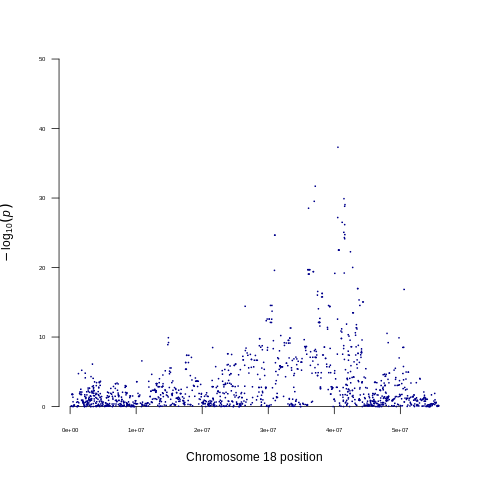

In [5]:
%%R
library(qqman)

gwas=read.table("SSC18_Mummy.assoc.fisher", header=TRUE)
manhattan(gwas, col = c("blue4", "orange3"), ylim = c(0, 50), cex = 0.2, cex.axis = 0.5, suggestiveline = F, genomewideline = F)

Examine the output, where is the most significant SNP located?

The reason that the significant SNPs are present over a region of 10 Mb is the high level of linkage disequilibrium (LD) within this pig breed. 

High LD means that many loci are linked and therefore many loci give the same signal in the GWAS. Especially in some commercial livestock breed, the level of LD is high due to the low effective population size (Ne).

## Part 5: Identification of causal variation and functional interpretation. ##
------------------

We looked at deleterious SNPs and indels (short insertion and deletions) in one of the case animals in the first part of this exercise. 
However, none of the deleterious variants were affecting genes that cause lethality in homozygous state (i.e. causing mummified piglets.) 

### Identifying structural changes ###

In addition to SNPs and indels, large structural changes may play a large role as well. 
We will investigate the presence of large structural variation (deletions and duplications) in the same carrier animal. 

In this exercise we will use CNV-seq to check for structural changes in our carrier animal in the region (35-45 Mb).
CNV-seq is a tool to detect copy number variation using sequencing data. The tool calculated the depth ratio between a case and a control sample. 
SVs will cause significant changes in depth, i.e. lower depth for deletion, and higher for duplications. We provide CNV-seq with two BAM files: 1 for the case animal, and 1 control animal.  

Lets run the CNV-seq analysis:

In [22]:
!samtools view -F 4 $datadir/Pig1.bam | perl -lane 'print "$F[2]\t$F[3]"' > case.hits ## Extract hits from case sample
!samtools view -F 4 $datadir/control.bam | perl -lane 'print "$F[2]\t$F[3]"' > control.hits ## Extract hits from control sample

!$datadir/cnv-seq.pl --test case.hits --ref control.hits --genome-size 10000000 ## Run CNV-seq
print("CNV-seq finished")

genome size used for calculation is 10000000
case.hits: 612149 reads
control.hits: 642103 reads
The minimum window size for detecting log2>= 0.6 should be 2121.64467046464
The minimum window size for detecting log2<=-0.6 should be 2161.89546482338
window size to use is 2161.89546482338 x 1.5 = 3243
window size to be used: 3243
read 612149 test reads, out of 612149 lines
read 642103 ref reads, out of 642103 lines
write read-counts into file: case.hits-vs-control.hits.log2-0.6.pvalue-0.001.count
R package cnv output: case.hits-vs-control.hits.log2-0.6.pvalue-0.001.minw-4.cnv
Loading required package: ggplot2
[1] "chromosome:  18"
[1] "cnv_id:  1  of  8"
[1] "cnv_id:  2  of  8"
[1] "cnv_id:  3  of  8"
[1] "cnv_id:  4  of  8"
[1] "cnv_id:  5  of  8"
[1] "cnv_id:  6  of  8"
[1] "cnv_id:  7  of  8"
[1] "cnv_id:  8  of  8"
CNV-seq finished


Plot the result using the R cnv package:

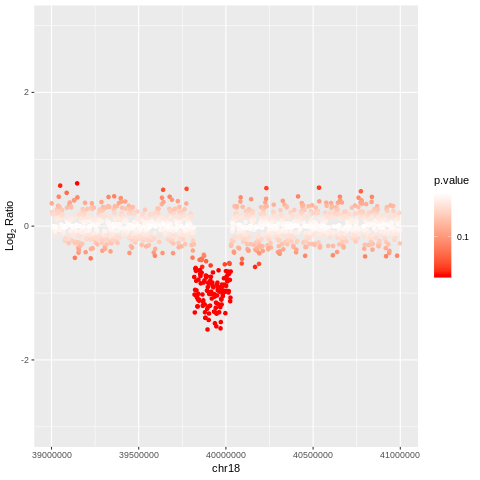

In [7]:
%%R
library(cnv)
data <- read.delim("case.hits-vs-control.hits.log2-0.6.pvalue-0.001.minw-4.cnv")
plot.cnv.chr(data, chromosome='18', from = 39000000, to = 41000000, title = "Mummy", ylim=c(-3,3), glim = c(NA, NA), xlabel = 'chr18')


What is the approximate size of the deletion? Which gene does it comprise?

Lets run the CNV-seq analysis with another test sample, what do you notice?

In [37]:
!samtools view -F 4 $datadir/Pig2.bam | perl -lane 'print "$F[2]\t$F[3]"' > case2.hits ## Extract hits from case sample

!$datadir/cnv-seq.pl --test case2.hits --ref control.hits --genome-size 10000000 ## Run CNV-seq


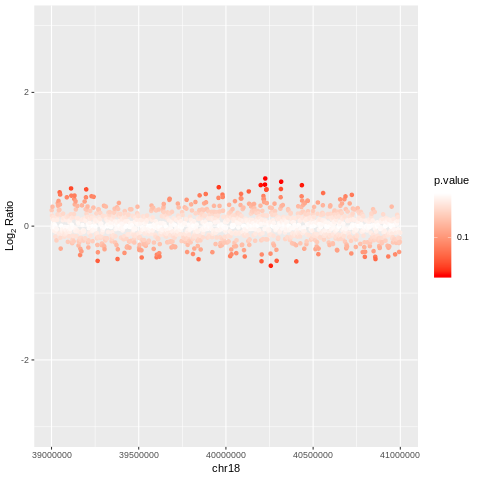

In [8]:
%%R
data <- read.delim("case2.hits-vs-control.hits.log2-0.6.pvalue-0.001.minw-4.cnv")
plot.cnv.chr(data, chromosome='18', from = 39000000, to = 41000000, title = "Case2", ylim=c(-3,3), glim = c(NA, NA), xlabel = 'chr18')


### Visualization (IGV) ###

Navigate to the IGV genome browser app and select the pig reference genome (Sscrofa11.1): https://igv.org/app/ 

Add the ensembl gene annotation track (Sscrofa11.1_SSC18.gff3) and load the Pig1 bam file (including index .bai file). Set the visibility window from the BAM track to 600000 (settings).
Now also load the control.bam file. Can you identify the breakpoints of the deletion?

Furthermore you can select the options "View as pairs" and "Show soft clips" to visualize the read pairs that support the deletion and the clipped reads. 

![Screenshot](images/IGV.PNG) 

The deletion likely causes a loss-of-function of the BBS9 gene. Look up the function of this gene, where is the gene involved in?

To get further functional support of the BBS9 gene we can examine the knockout (KO) mice phenotypes in the [`MGI database`](http://www.informatics.jax.org/).
What kind of abnormal phenotypes do the KO mice develop? Do you expect this to be the same in pig?

An impaired BBS9 gene does not lead to fetal lethality. However, it could be that the deletions also affects regulatory elements that are essential for normal development. 
To assess the presence of regulatory elements (e.g. enhancer/promotor sites) we can use ChIP-seq data. ChIP-seq is a very powerful method to detect interaction between DNA and protein. 
One of the most common applications of ChIP-seq is to detect specific histone modifications in the genome. Histone modifications are one of the most important epigenetic marks in the genome for determine gene expression (or not) and a large variety of histone modifications are present in the cell.
Some histone modifications has been widely used in the ENCODE projects because they are highly informative on gene expression. Some examples:

H3K4me3 (histone H3 lysine 4 tri-methylation); found at the promoter of all expressed genes.

H3K27Ac (histone H3 lysine 27 acetylation); identifies active enhancer elements.

In this exercise you will be working with a small dataset of H3K4me3 and H3K27Ac ChIP-seq data from pig liver within the SSC18 region. 
Both datasets are aligned to the pig reference genome and peaks are called to identify active enhancer and promotor sites. 

Load the BAM files (Pig_H3K27Ac.bam, Pig_H3K4me3.bam) to IGV. Does the deletion comprise (cis-)regulatory elements? 

### Link the GWAS SNP with the causal variant ###

Below you find the most significant SNP in the GWAS result:

| Element | Info | 
| :---         | :---:      |
| SNP ID | ALGA0106178 |
| Position (bp) | 40549984 |
| Reference allele | T |
| Alternative allele | C |
| Frequency (affected) | 0.5251 |
| Frequency (unaffected) | 0.1119 |
| P-value | 4.913e-38 |

Why is this SNP associated with the phenotype? 

### Population VCF ### 

To link the GWAS SNP to the causal mutation we can examine the variants derived from 50 whole-genome sequenced samples. 
Navigate to the vcf directory and look at the header of the VCF file:


In [9]:
!bcftools view -h $datadir/SSC18_LW.vcf.gz

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##fileDate=20180728
##source=freeBayes v1.1.0-3-g961e5f3
##reference=/lustre/backup/SHARED/TOPIGS_WUR/BAMS_11.1/GCA_000003025.6_Sscrofa11.1_genomic.fna
##contig=<ID=1,length=274330532>
##contig=<ID=2,length=151935994>
##contig=<ID=3,length=132848913>
##contig=<ID=4,length=130910915>
##contig=<ID=5,length=104526007>
##contig=<ID=6,length=170843587>
##contig=<ID=7,length=121844099>
##contig=<ID=8,length=138966237>
##contig=<ID=9,length=139512083>
##contig=<ID=10,length=69359453>
##contig=<ID=11,length=79169978>
##contig=<ID=12,length=61602749>
##contig=<ID=13,length=208334590>
##contig=<ID=14,length=141755446>
##contig=<ID=15,length=140412725>
##contig=<ID=16,length=79944280>
##contig=<ID=17,length=63494081>
##contig=<ID=18,length=55982971>
##contig=<ID=X,length=125939595>
##contig=<ID=Y,length=43547828>
##contig=<ID=Y_unloc_scaf1,length=438769>
##contig=<ID=Y_unloc_scaf2,length=492890>
##contig=<ID=Y_unloc_scaf3,le

Look at the allele frequency of the ALGA0106178 SNP in this set of sequenced samples.

In [10]:
!bcftools query -r 18:40549984 -f '%CHROM\t%POS\t%REF\t%ALT\t%AF[\t%SAMPLE=%GT]\n' $datadir/SSC18_LW.vcf.gz | sed 's/\t/\n/g'

18
40549984
G
T
0.93
Pig_WUR_342=0/1
Pig_328=0/1
Pig_WUR_346=0/1
Pig_WUR_361=0/1
Pig_WUR_368=0/1
Pig_271=1/1
Pig_280=1/1
Pig_281=1/1
Pig_285=1/1
Pig_286=1/1
Pig_287=1/1
Pig_288=1/1
Pig_289=1/1
Pig_290=1/1
Pig_291=1/1
Pig_292=1/1
Pig_293=1/1
Pig_294=1/1
Pig_295=1/1
Pig_296=0/1
Pig_297=1/1
Pig_298=1/1
Pig_299=1/1
Pig_300=1/1
Pig_301=1/1
Pig_302=1/1
Pig_303=1/1
Pig_304=1/1
Pig_305=1/1
Pig_306=1/1
Pig_307=1/1
Pig_308=1/1
Pig_309=1/1
Pig_312=0/1
Pig_320=1/1
Pig_321=1/1
Pig_322=1/1
Pig_323=1/1
Pig_324=1/1
Pig_325=1/1
Pig_326=1/1
Pig_327=1/1
Pig_329=1/1
Pig_330=1/1
Pig_WUR_331=1/1
Pig_WUR_332=1/1
Pig_WUR_333=1/1
Pig_WUR_334=1/1
Pig_WUR_335=1/1
Pig_WUR_336=1/1


Which seven samples are heterozygous for this SNP?

18
40549984
G
T
0.93
**Pig_WUR_342=0/1
Pig_328=0/1
Pig_WUR_346=0/1
Pig_WUR_361=0/1
Pig_WUR_368=0/1**
Pig_271=1/1
Pig_280=1/1
Pig_281=1/1
Pig_285=1/1
Pig_286=1/1
Pig_287=1/1
Pig_288=1/1
Pig_289=1/1
Pig_290=1/1
Pig_291=1/1
Pig_292=1/1
Pig_293=1/1
Pig_294=1/1
Pig_295=1/1
**Pig_296=0/1**
Pig_297=1/1
Pig_298=1/1
Pig_299=1/1
Pig_300=1/1
Pig_301=1/1
Pig_302=1/1
Pig_303=1/1
Pig_304=1/1
Pig_305=1/1
Pig_306=1/1
Pig_307=1/1
Pig_308=1/1
Pig_309=1/1
**Pig_312=0/1**
Pig_320=1/1
Pig_321=1/1
Pig_322=1/1
Pig_323=1/1
Pig_324=1/1
Pig_325=1/1
Pig_326=1/1
Pig_327=1/1
Pig_329=1/1
Pig_330=1/1
Pig_WUR_331=1/1
Pig_WUR_332=1/1
Pig_WUR_333=1/1
Pig_WUR_334=1/1
Pig_WUR_335=1/1
Pig_WUR_336=1/1

Now look at the deletion: 

In [11]:
!bcftools query -r 18:39817372 -f '%CHROM\t%POS\t%REF\t%ALT\t%AF[\t%SAMPLE=%GT]\n' $datadir/SSC18_LW.vcf.gz | sed 's/\t/\n/g'

18
39817372
N
<DEL>
0.06
Pig_WUR_342=0/1
Pig_328=0/1
Pig_WUR_346=0/1
Pig_WUR_361=0/1
Pig_WUR_368=0/1
Pig_271=0/0
Pig_280=0/0
Pig_281=0/0
Pig_285=0/0
Pig_286=0/0
Pig_287=0/0
Pig_288=0/0
Pig_289=0/0
Pig_290=0/0
Pig_291=0/0
Pig_292=0/0
Pig_293=0/0
Pig_294=0/0
Pig_295=0/0
Pig_296=0/1
Pig_297=0/0
Pig_298=0/0
Pig_299=0/0
Pig_300=0/0
Pig_301=0/0
Pig_302=0/0
Pig_303=0/0
Pig_304=0/0
Pig_305=0/0
Pig_306=0/0
Pig_307=0/0
Pig_308=0/0
Pig_309=0/0
Pig_312=0/0
Pig_320=0/0
Pig_321=0/0
Pig_322=0/0
Pig_323=0/0
Pig_324=0/0
Pig_325=0/0
Pig_326=0/0
Pig_327=0/0
Pig_329=0/0
Pig_330=0/0
Pig_WUR_331=0/0
Pig_WUR_332=0/0
Pig_WUR_333=0/0
Pig_WUR_334=0/0
Pig_WUR_335=0/0
Pig_WUR_336=0/0


What is the allele frequency of the deletion? Which six samples are heterozygous? 

18
39817372
N
DEL
0.06
**Pig_WUR_342=0/1
Pig_328=0/1
Pig_WUR_346=0/1
Pig_WUR_361=0/1
Pig_WUR_368=0/1**
Pig_271=0/0
Pig_280=0/0
Pig_281=0/0
Pig_285=0/0
Pig_286=0/0
Pig_287=0/0
Pig_288=0/0
Pig_289=0/0
Pig_290=0/0
Pig_291=0/0
Pig_292=0/0
Pig_293=0/0
Pig_294=0/0
Pig_295=0/0
**Pig_296=0/1**
Pig_297=0/0
Pig_298=0/0
Pig_299=0/0
Pig_300=0/0
Pig_301=0/0
Pig_302=0/0
Pig_303=0/0
Pig_304=0/0
Pig_305=0/0
Pig_306=0/0
Pig_307=0/0
Pig_308=0/0
Pig_309=0/0
Pig_312=0/0
Pig_320=0/0
Pig_321=0/0
Pig_322=0/0
Pig_323=0/0
Pig_324=0/0
Pig_325=0/0
Pig_326=0/0
Pig_327=0/0
Pig_329=0/0
Pig_330=0/0
Pig_WUR_331=0/0
Pig_WUR_332=0/0
Pig_WUR_333=0/0
Pig_WUR_334=0/0
Pig_WUR_335=0/0
Pig_WUR_336=0/0

Based on these results we can conclude that the G allele of the ALGA0106178 SNP is strongly linked to the causal deletion (only one sample does not show this linkage; Pig_312).


## Inferring function with PROVEAN ##

Various tools can be used to predict the likelihood that an missense mutation (amino acid change) has impact.  
Provean uses an approach where a protein sequence is compared (Psiblast)
to all known protein sequences (so called 'non-redundant database').
Subsequent clustering defines a group of 'similar', and implicitly
homologous sequences. An example of in- and output of a pig sequence:

What goes in:

`
Protein sequence (Fasta):
  >ENSSSCP00000018263 pep:novel chromosome:Sscrofa10.2:12:6621092:6624938:1 gene:ENSSSCG00000017236 transcript:ENSSSCT00000018765 gene_biotype:protein_coding t transcript_biotype:protein_coding  
  MTPRVGAVWLPSALLLLRVPGCLSLSGPPTAMGTKGGSLSVQCRYEEEYIDDKKYWDKSP
  CFLSWKHIVETTESAREVRRGRVSIRDDPANLTFTVTLERLTEEDAGTYCCGITAQFSVD
  PTHEVEVVVFPALGTSRPPSMPGPPTTLPATTWSFVSERETMANNLGKGPASQDPGQHPR
  SKHPSIRLLLLVFLEVPLFLGMLGAVLWVHRPLRSSESRSVAMDPVPGNTAPSAGWK
`

and variation, with coordinates pertaining the above protein sequences,
the second column the reference amino acid, and the third/last column
the alternative amino acid (alternative allele):

` 235,G,E`  
` 5,V,A`  
` 22,C,Y`  
` 34,T,I`  
` 51,D,N`  
` 53,K,N`  
` 59,S,Y`  
` 61,C,R`  
` 64,S,L`  
` 67,H,P`  
` 68,I,T`  
` 75,A,V`  
` 108,T,K`  
` 115,A,T`  
` 124,E,D`  
` 130,F,Y`  
` 133,L,P`  
` 142,P,A `  
` 155,F,I`  
` 158,E,G`  
` 186,I,V `  
` 21,G,D`  

Output looks like this:

`  235,G,E   0.076 `  
`  5,V,A 0.287 `  
`  22,C,Y    -8.028 `  
`  34,T,I    -1.932 `  
`  51,D,N    -1.613 `  
`  53,K,N    1.565 `  
`  59,S,Y    -2.140 `  
`  61,C,R    -5.826 `  
`  64,S,L    -0.437 `  
`  67,H,P    -0.511 `  
`  68,I,T    -2.664 `  
`  75,A,V    -1.061 `  
`  108,T,K   -4.051 `  
`  115,A,T   1.557 `  
`  124,E,D   -1.587 `  
`  130,F,Y   -0.983 `  
`  133,L,P   3.203 `  
`  142,P,A   -2.058 `  
`  155,F,I   0.502 `  
`  158,E,G   -0.077 `  
`  186,I,V   0.220 `  
`  21,G,D    -6.014 `  

We will do something similar, although with a somewhat less complex
example. We will examine a variant in the NR6A1 gene, ENSSSCG00000005589.

[`http://www.ensembl.org/Sus_scrofa/Gene/Summary?db=core;g=ENSSSCG00000005589;r=1:265322049-265570921`](http://www.ensembl.org/Sus_scrofa/Gene/Summary?db=core;g=ENSSSCG00000005589;r=1:265322049-265570921)

What we need for the Provean analysis is 1) the protein sequence of the
gene (or rather, the transcript), and 2) a file with the variation in
the same format as listed above. 

All our sequenced Large White pigs have a missense variant (Pro192Leu) in this gene. We can use provean to infer the impact of this variant. 

Two files are available to run the analysis:

ENSSSCG00000005589.fa

`>sp|A0P8Z4|NR6A1_PIG Nuclear receptor subfamily 6 group A member 1 OS=Sus scrofa OX=9823 GN=NR6A1 PE=1 SV=2`  
`MERDERPPSGGGGGGGSAGFLEPPAALPPPPRNGFCQDELAELDPSTISVPDDRAEQRTC`  
`LICGDRATGLHYGIISCEGCKGFFKRSICNKRVYRCSRDKNCVMSRKQRNRCQYCRLLKC`  
`LQMGMNRKAIREDGMPGGRNKSIGPVQISEEEIERIMSGQEFEEEANHWSNHGDSDHSSP`  
`GNRASESNQPSPGSTLSSRSVELNGFMAFRDQYMGMSVPPHYQYIPHLFSYSAHSPLLPP`  
`QARSLDPQSYSLIHQLVSAEDLEPLGTPMLIEDGYAVTQAELFALLCRLADELLFRQIAW`  
`IKKLPFFCELSIKDYTCLLSSTWQELILLSSLTVYSKQIFGELADVTAKYSPSDEELHRF`  
`SDEGMEVIERLIYLYHKFHQLKVSNEEYACMKAINFLNQDIRGLTSASQLEQLNKRYWYI`  
`CQDFTEYKYTHQPNRFPDLMMCLPEIRYIAGKMVNVPLEQLPLLFKVVLHSCKTSVGKE`  

ENSSSCG00000005589.var

`P192L`

Finally, the actual Provean analysis is done with this command (this may
take a few minutes to run):

In [25]:
!provean --num_threads 1 -q $datadir/ENSSSCG00000005589.fa -v $datadir/ENSSSCG00000005589.var -d /lustre/shared/public_data_store/nrdb/nrdb_241213/nr --cdhit cd-hit --psiblast psiblast --blastdbcmd blastdbcmd --supporting_set $datadir/ENSSSCG00000005589.sss
print("provean analysis finished")

## PROVEAN v1.1 output ##
## Input Arguments ##
provean --num_threads 1 -q /home/WUR/derks047/data/variationingenomics/data//ENSSSCG00000005589.fa -v /home/WUR/derks047/data/variationingenomics/data//ENSSSCG00000005589.var -d /lustre/shared/public_data_store/nrdb/nrdb_241213/nr --cdhit cd-hit --psiblast psiblast --blastdbcmd blastdbcmd --supporting_set /home/WUR/derks047/data/variationingenomics/data//ENSSSCG00000005589.sss 

## Parameters ##
# Query sequence file:	/home/WUR/derks047/data/variationingenomics/data//ENSSSCG00000005589.fa
# Variation file:	/home/WUR/derks047/data/variationingenomics/data//ENSSSCG00000005589.var
# Protein database:	/lustre/shared/public_data_store/nrdb/nrdb_241213/nr
# Supporting sequence set file (optional):	/home/WUR/derks047/data/variationingenomics/data//ENSSSCG00000005589.sss
# Supporting sequence set file for storing (optional):	Not provided
# Substitution matrix:	BLOSUM62
# Gap costs:	10, 1
# Clustering threshold:	0.750
# Maximum number of clusters:

Study the result. What is the verdict on the alternative allele?
(P--\>L)

Provean does many things 'under the hood'. When you follow the process
(e.g. using the 'top' command in a second terminal screen), you will
notice that the majority of time is spent on Psiblast, and that it takes
quite a bit of the total memory of the node you are working on
(typically \>10GB of ram). The similar sequences that Provean fished out
of the nr-database and then clustered are written to a 'supporting set'
(because you asked Provean to save the supporting set by using the
--save\_supporting flag). Briefly investigate what is in the supporting
set (extension .sss.fasta).

The supporting sequences are not aligned. Chances are that among the
supporting sequences there is a pig sequence. Bit cumbersome to figure
out which is which (although doable using blastdb tools - we won't go
into that here). Easiest is to add the protein sequence you have used
for the Provean analysis and add it to the supporting set fasta file
(using the '\>\>', note that you need TWO of these to add to a file,
otherwise the file will get overwritten if you use only one!).

In [7]:
## add protein sequence to supporting set fasta:
!cat $datadir/ENSSSCG00000005589.fa >> $datadir/ENSSSCG00000005589.sss.fasta
  
## align all protein sequences using the multiple sequence aligner mafft:
!mafft --auto $datadir/ENSSSCG00000005589.sss.fasta > ENSSSCG00000005589.sss.fasta.out

##![Screenshot]($datadir/images/MSA.PNG) 

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: -1 kb
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 60 ambiguous characters.
  201 / 213
done.

Constructing a UPGMA tree (efffree=0) ... 
  210 / 213
done.

Progressive alignment 1/2... 
STEP   202 / 212  h
Reallocating..done. *alloclen = 3693
STEP   212 / 212  h
done.

Making a distance matrix from msa.. 
  200 / 213
done.

Constructing a UPGMA tree (efffree=1) ... 
  210 / 213
done.

Progressive alignment 2/2... 
STEP   209 / 212  h
Reallocating..done. *alloclen = 3747
STEP   211 / 212  h
Reallocating..done. *alloclen = 4771
STEP   212 / 212  h
done.

disttbfast (aa) Version 7.407
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)

dndpre (aa) Version 7.407
alg=X, model=BLOSUM62, 1.53, +0.12, -0.00, noshift, amax=0.0
0 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 2
sueff_globa

You can view the alignment through this online tool:

` `[`https://toolkit.tuebingen.mpg.de/#/tools/alnviz`](https://toolkit.tuebingen.mpg.de/#/tools/alnviz)

What do you observe for the amino-acid (P->L) of the pig protein sequence?
In this 'implicit evolutionary context' is there another alternative
amino acid residue possible?

Through the orthology with human, try to find some possible phenotypic
consequences of the alternative allele in literature. Could there
be a reason that the variant is at a relatively high frequency in this
pig population?

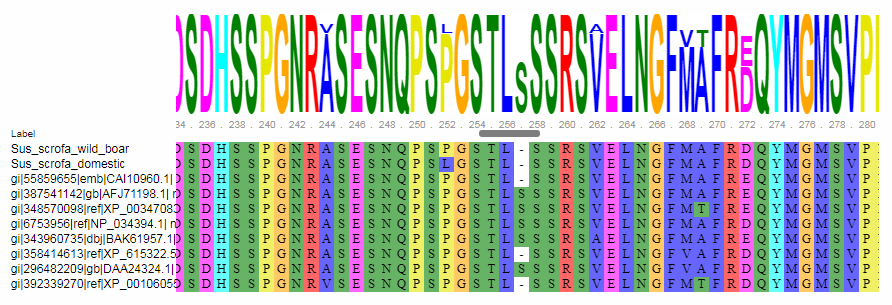

In [14]:
from IPython.display import Image
Image(filename=datadir+'/images/MSA.PNG')